In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from time import time
from sklearn.model_selection import GridSearchCV


In [120]:
with open('names.txt') as f:
    words = f.read().split()

In [121]:
words

['Name',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [122]:
soils = []
for i in range(40):
    soils.append('soil'+str(i))

In [123]:
wild_area = []
for i in range(4):
    wild_area.append('wild_area'+str(i))

In [124]:
names = words + soils + wild_area

In [126]:
df = pd.read_csv('covtype.data', names=names)

C:\Users\grech\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


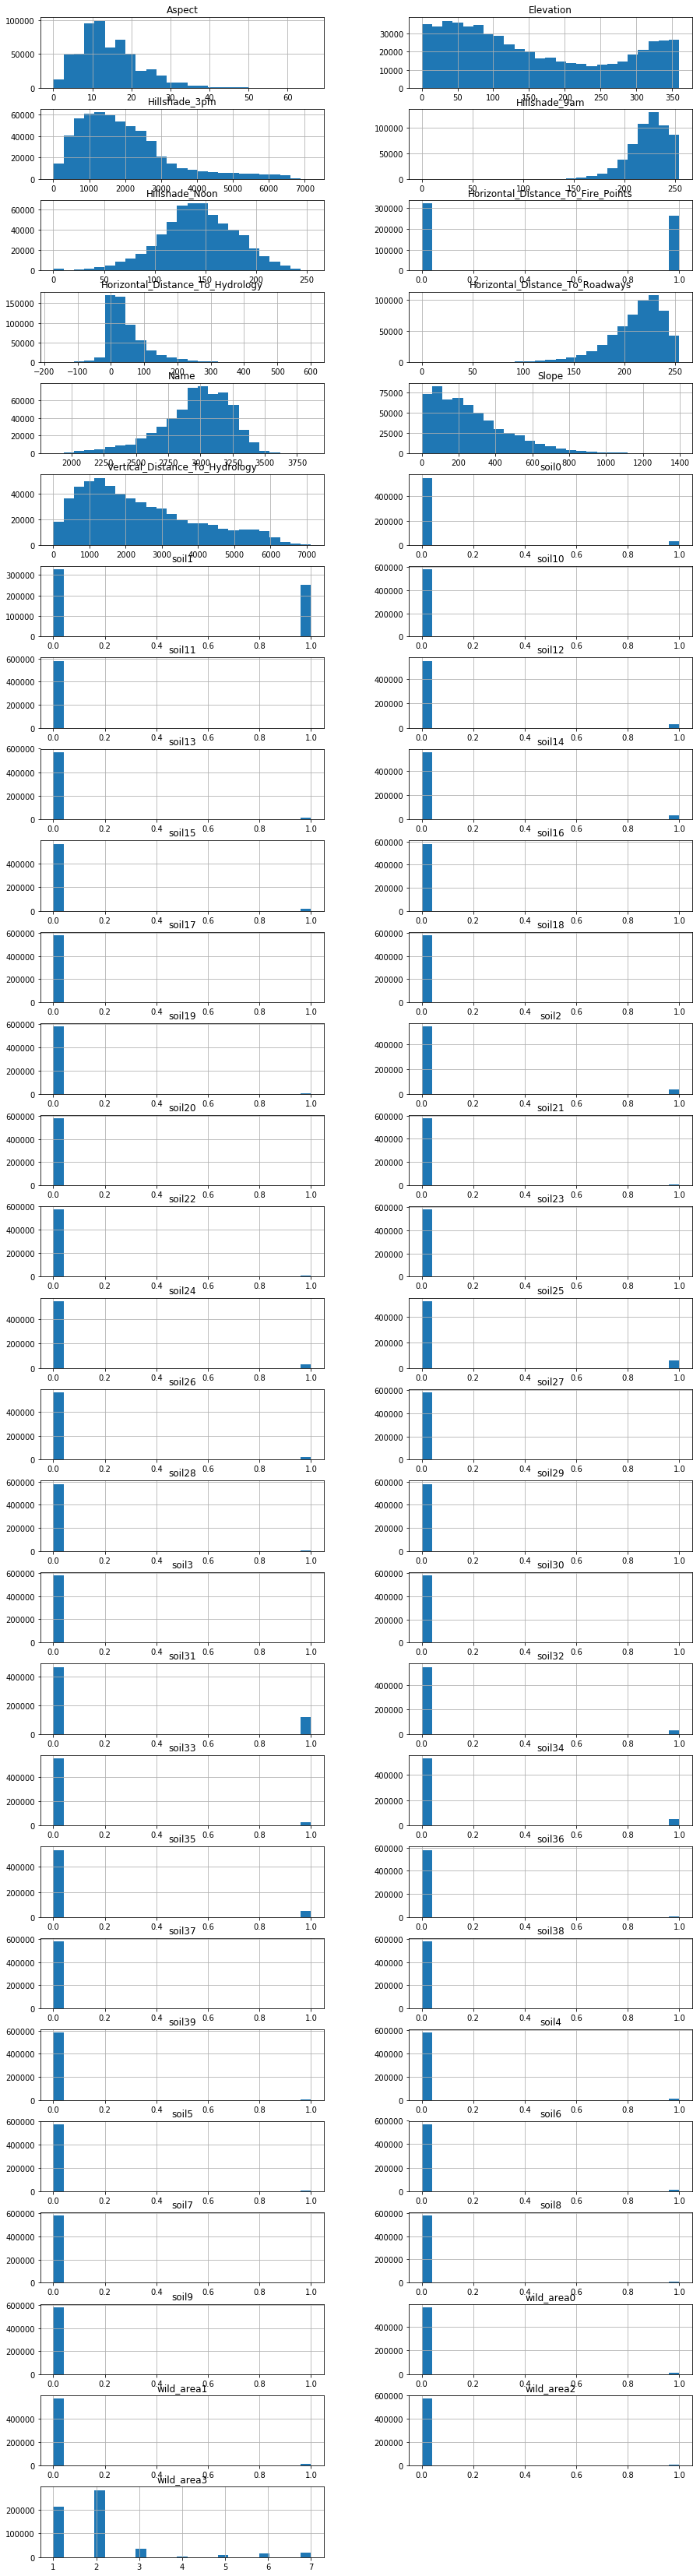

In [127]:
fig = plt.figure(figsize = (15,60))
ax = fig.gca()
df.hist(ax = ax, bins = 25, layout=(-1, 2))
plt.show()

In [4]:
y_all = df.pop('5').values
X_all = df.values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.33, 
                                                    random_state = 5, stratify = y_all)

In [7]:
X_train_ = X_train[:5000]
X_test_ = X_test[:1000]
y_train_ = y_train[:5000]
y_test_ = y_test[:1000]

In [8]:
models = [LogisticRegression(), LinearSVC(), NearestCentroid()]

In [9]:
def perform_cross_validation(X, y, strat = True, scaled = False):
    
    scaler = StandardScaler()
    
    if scaled == True:
        X = scaler.fit_transform(X)
        
    for model in models:
        start = time()
    
        if strat == True:
            scores = cross_val_score(model, X, y, cv=5)
        else:
            scores = cross_val_score(model, X, y, cv=KFold(n_splits=5)) 
            
        end = time()
        print(str(model).split('(')[0] + ' Mean Accuracy', abs(scores).mean(), 'time =', str(end-start))

In [10]:
perform_cross_validation(X_train_, y_train_, strat = True, scaled = False)

LogisticRegression Mean Accuracy 0.7078007571172155 time = 2.250239372253418
LinearSVC Mean Accuracy 0.48600599513140247 time = 8.282138109207153
NearestCentroid Mean Accuracy 0.21098737064381665 time = 0.031250715255737305


In [11]:
perform_cross_validation(X_train_, y_train_, strat = True, scaled = True)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LogisticRegression Mean Accuracy 0.7105953624830063 time = 2.594029426574707
LinearSVC Mean Accuracy 0.7077947438642793 time = 10.580793857574463
NearestCentroid Mean Accuracy 0.5624042099505255 time = 0.03125810623168945


In [13]:
perform_cross_validation(X_train_, y_train_, strat = False, scaled = False)

LogisticRegression Mean Accuracy 0.7053999999999999 time = 2.109630584716797
LinearSVC Mean Accuracy 0.5042000000000001 time = 9.110347509384155
NearestCentroid Mean Accuracy 0.21400000000000002 time = 0.01559901237487793


In [94]:
def run_grid_search(model, params, X, y, scaled = True):
    if scaled:
        scaler = StandardScaler()
        X_train_ = scaler.fit_transform(X)
    
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train_, y)
    results = grid.grid_scores_
    
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        try:
            param = score[0]['C']
        except:
            param = score[0]['shrink_threshold']
            
        scores.append(abs(mean))
        params.append(param)
        
        
    ax = plt.subplot(111)
    ax.scatter(params, scores)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Parameter Tuned')
    ax.set_ylabel('Average Accuracy')
    plt.show()    

In [88]:
param = {'C' : np.linspace(1e-8, 10, 10)}
paramSVC = {'C' : np.linspace(1e-8, 1, 10)}
neighbor_param = {'shrink_threshold' : np.linspace(0.1, 10, 10)}

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


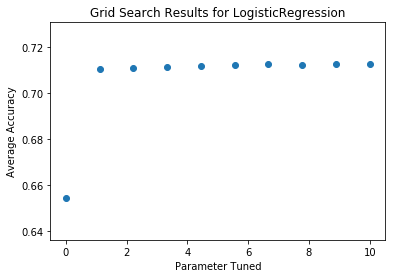

In [91]:
run_grid_search(LogisticRegression(), param, X_train_, y_train_)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


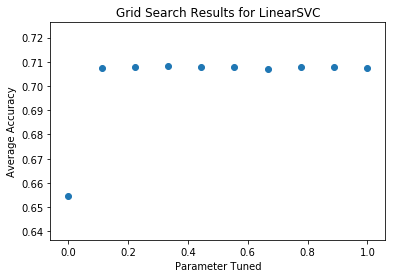

In [92]:
run_grid_search(LinearSVC(), paramSVC, X_train_, y_train_)

C:\Users\grech\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\grech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


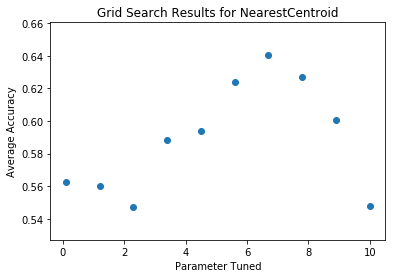

In [93]:
run_grid_search(NearestCentroid(), neighbor_param, X_train_, y_train_)

### Chaging the random seed does not change the best value by much. The LogisticRegression model is fairly good without optimization along with the Support Vector Machine. Changing the cross validation strategy so that it is not stratified sampling hurts the performance of the models, and does not provide the optimum values.

In [26]:
imps = []
for model in models[:-1]:
    model.fit(X_train_, y_train_)
    feature_imp = model.coef_
    imps.append(feature_imp)
    print(str(model))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [65]:
imp1 = imps[0]
imp2 = imps[1]

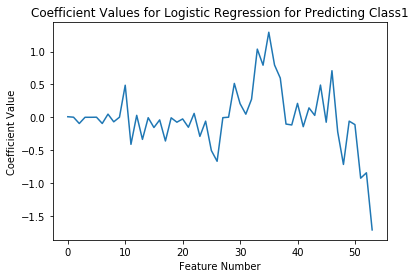

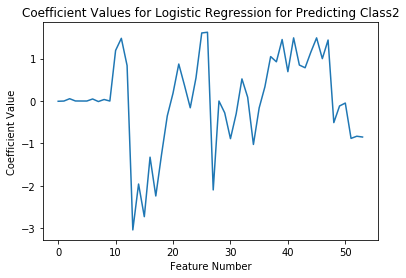

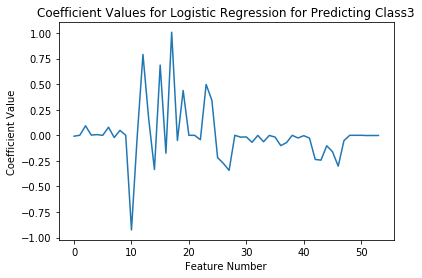

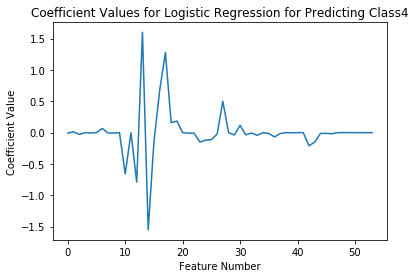

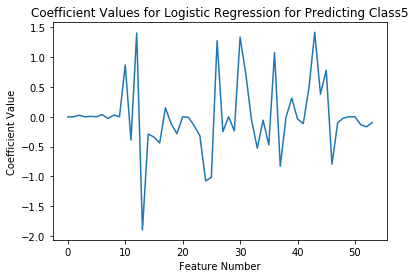

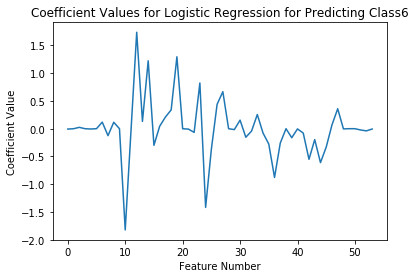

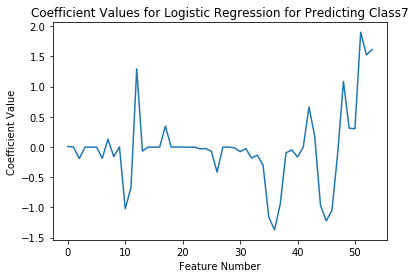

In [64]:
for i, imp in enumerate(imp1):
    ax = plt.subplot(111)
    ax.plot(imp)
    ax.set_title('Coefficient Values for Logistic Regression for Predicting Class' + str(i+1))
    ax.set_xlabel('Feature Number')
    ax.set_ylabel('Coefficient Value')
    plt.show() 

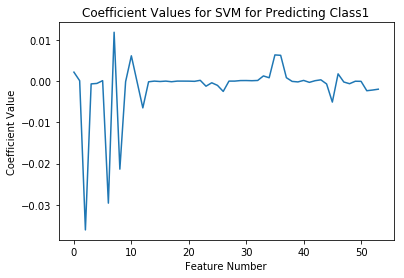

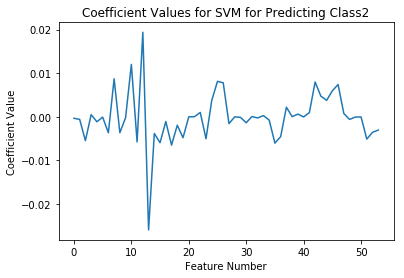

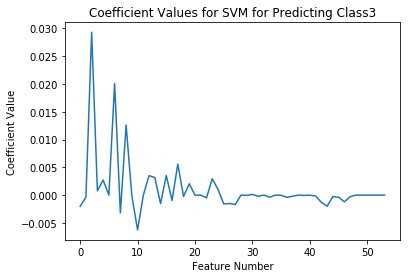

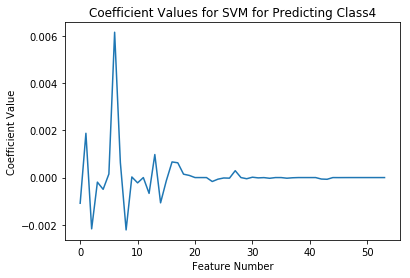

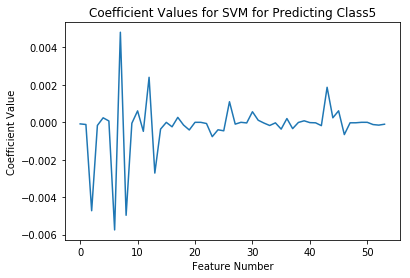

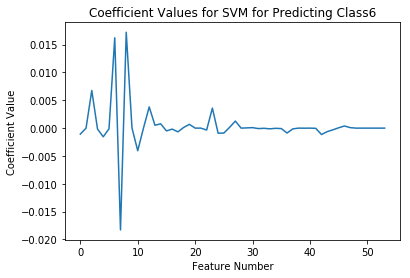

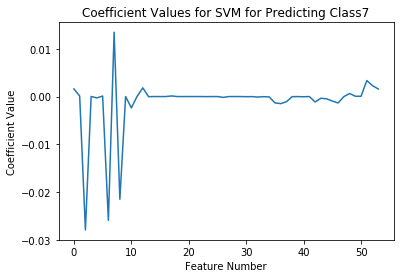

In [68]:
for i, imp in enumerate(imp2):
    ax = plt.subplot(111)
    ax.plot(imp)
    ax.set_title('Coefficient Values for SVM for Predicting Class' + str(i+1))
    ax.set_xlabel('Feature Number')
    ax.set_ylabel('Coefficient Value')
    plt.show() 